# **Marketing Mix Modeling (MMM)**
MMM is a statistical analysis technique that helps marketers understand the impact of various marketing activities on sales or other key performance indicators (KPIs). Ordinary Least Squares (OLS) regression is a common method used for this purpose.

In MMM, we use historical data to assess the influence of different marketing channels, like TV, radio, digital advertising, and other factors, on a target variable like sales. OLS regression allows us to determine the relationship between these variables.

Here is a Python example of how you might conduct marketing mix modeling using OLS regression with statsmodels

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.read_excel("data0.xlsx")
print(df.columns)
df= df[['Week',	'Revenue',	'Newspaper Ads',	'Search Ads',	'Social Ads',	'Price Change',	'Temperature',	'Holiday']]
# rename columns
df.columns = ['Week',	'Revenue',	'Newspaper_Ads',	'Search_Ads',	'Social_Ads',	'Price_Change',	'Temperature',	'Holiday']
df.head()

Index(['Week', 'Revenue', 'Newspaper Ads', 'Search Ads', 'Social Ads',
       'Price Change', 'Temperature', 'Holiday'],
      dtype='object')


,Week,Revenue,Newspaper_Ads,Search_Ads,Social_Ads,Price_Change,Temperature,Holiday
0,1,3302.99,0,0,0,0.0,39.8,1
1,2,2706.27,0,0,0,0.0,37.3,0
2,3,2330.41,0,0,0,0.0,38.6,0
3,4,2351.63,0,0,0,0.0,32.3,0
4,5,2398.48,0,10,0,0.0,34.9,0


/Users/amirfeizi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


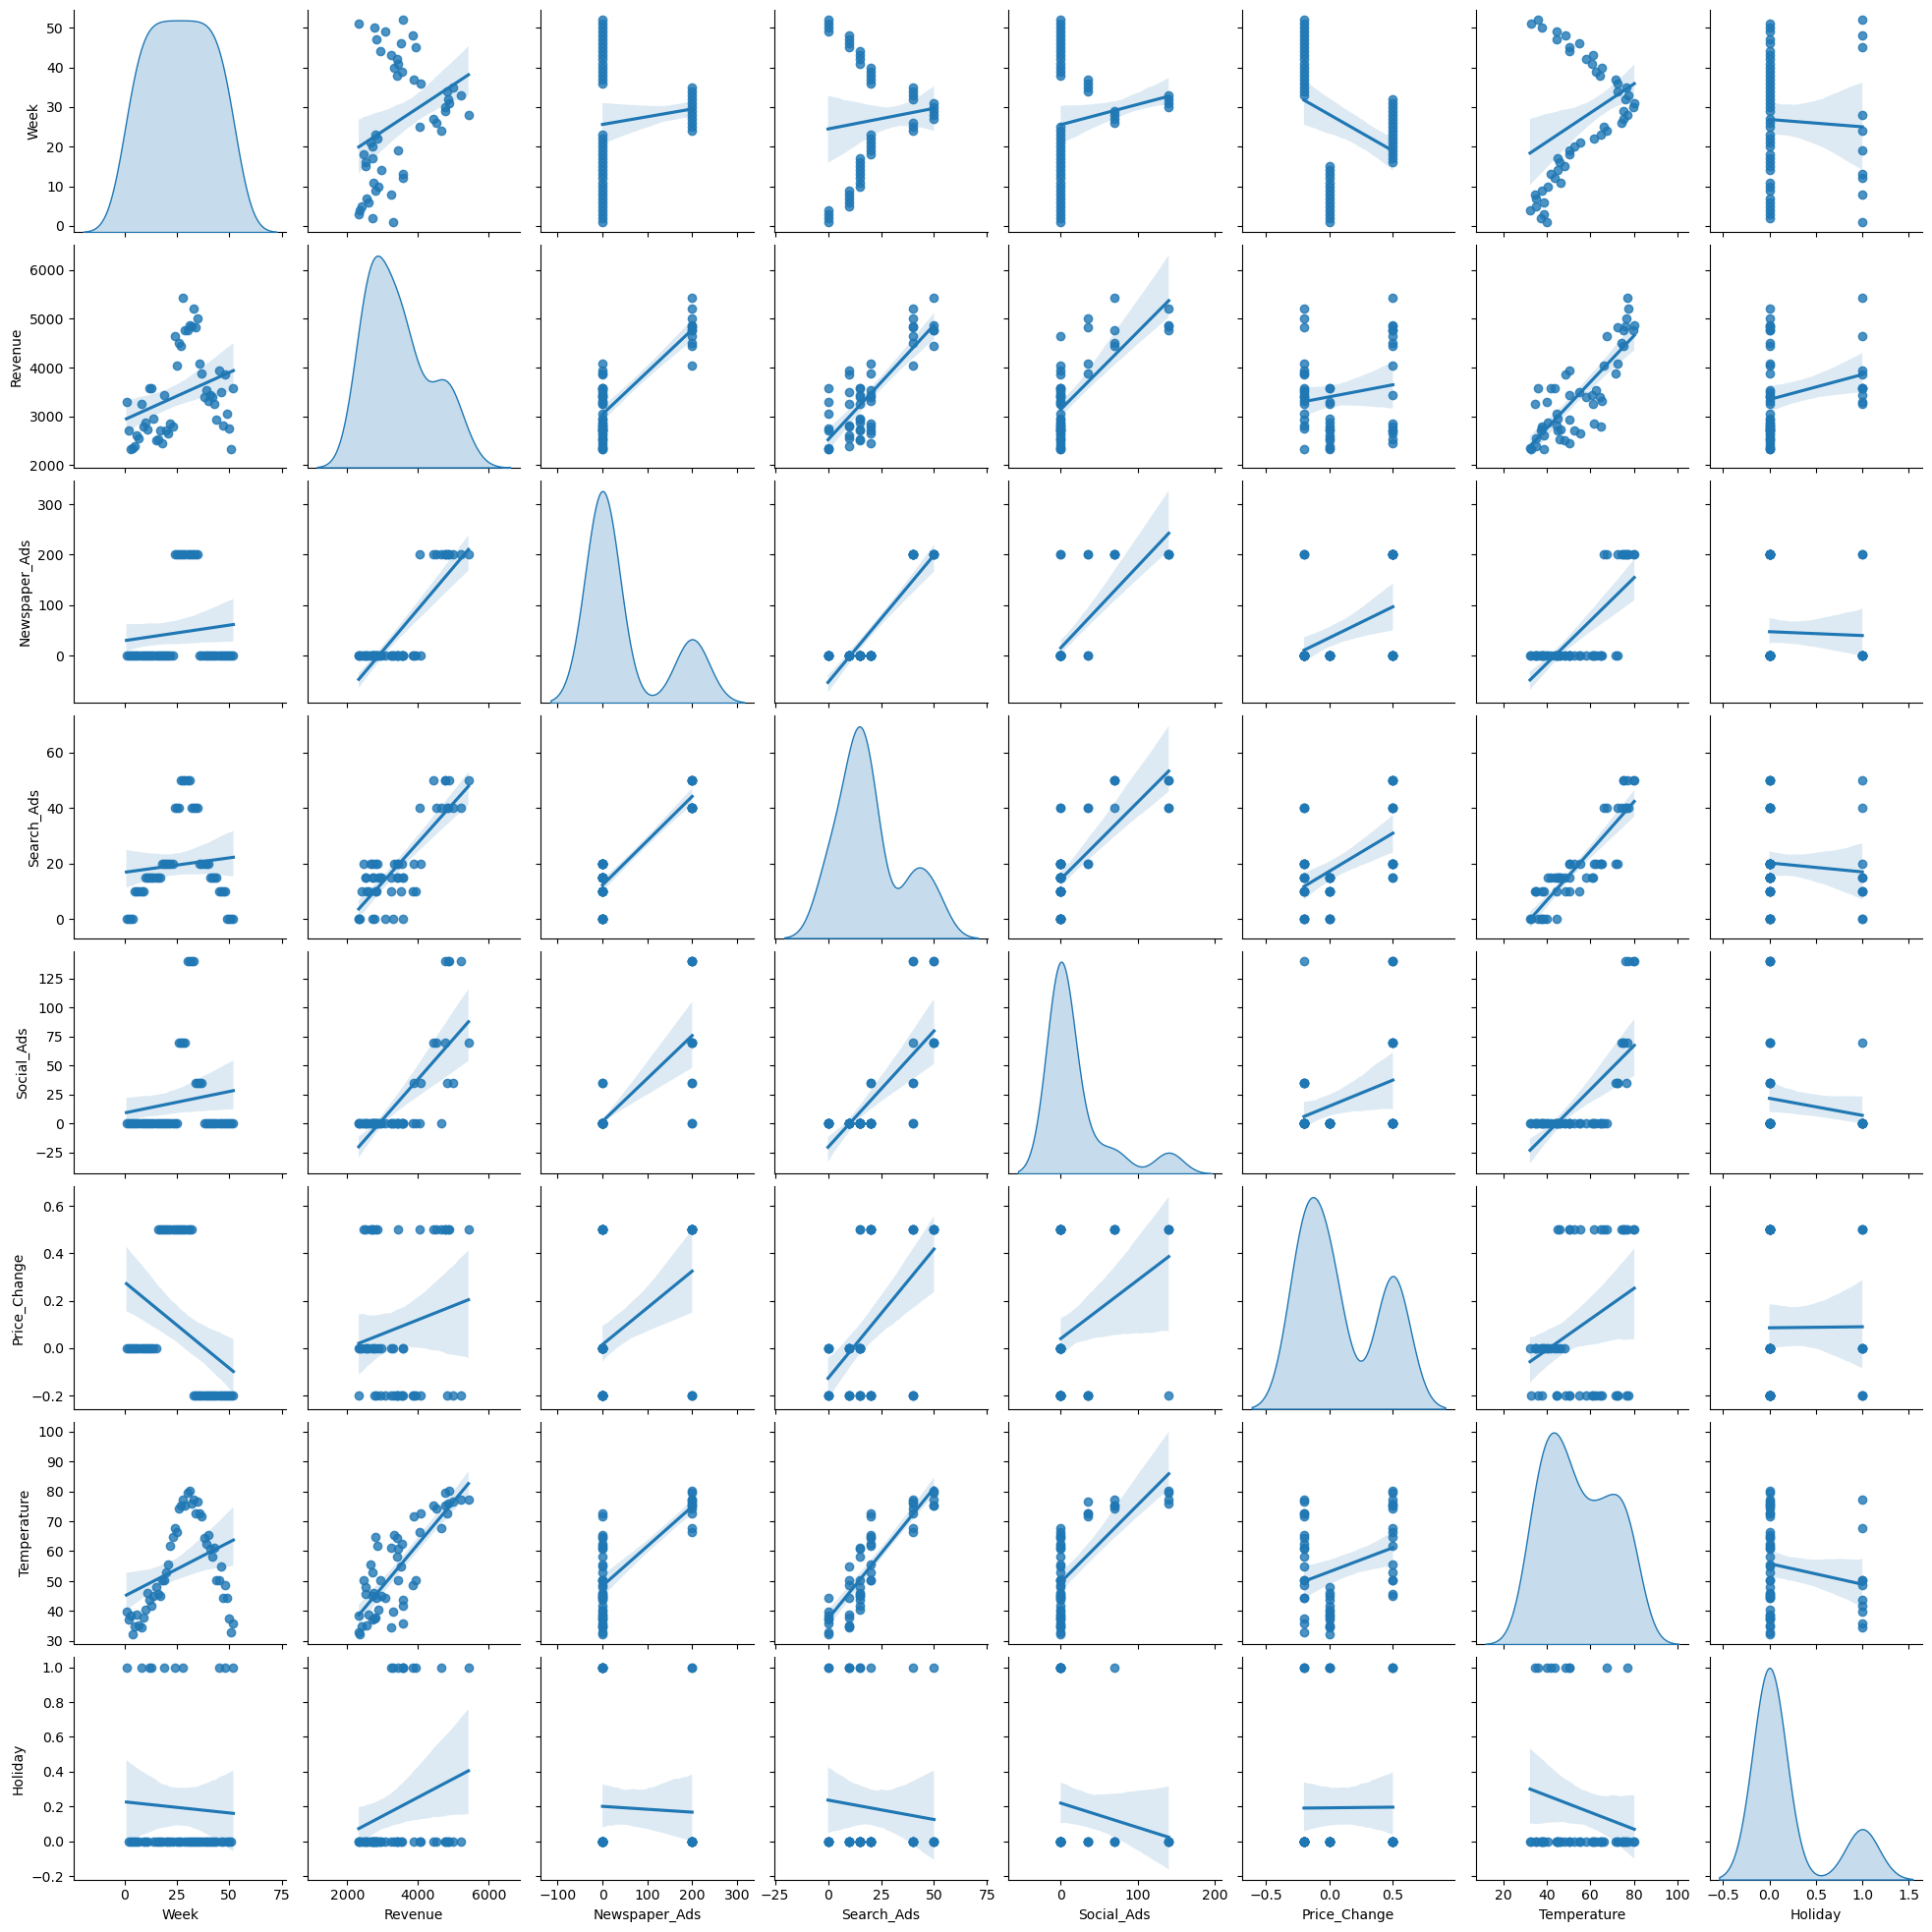

In [3]:
# Visualize the data
sns.pairplot(df, diag_kind='kde', kind='reg')
plt.show()

In [4]:
# Define the independent variables (X) and the dependent variable (y)
X = df[[	'Newspaper_Ads',	'Search_Ads', 'Social_Ads',	'Price_Change',	'Temperature',	'Holiday']]
y = df['Revenue']

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled data
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


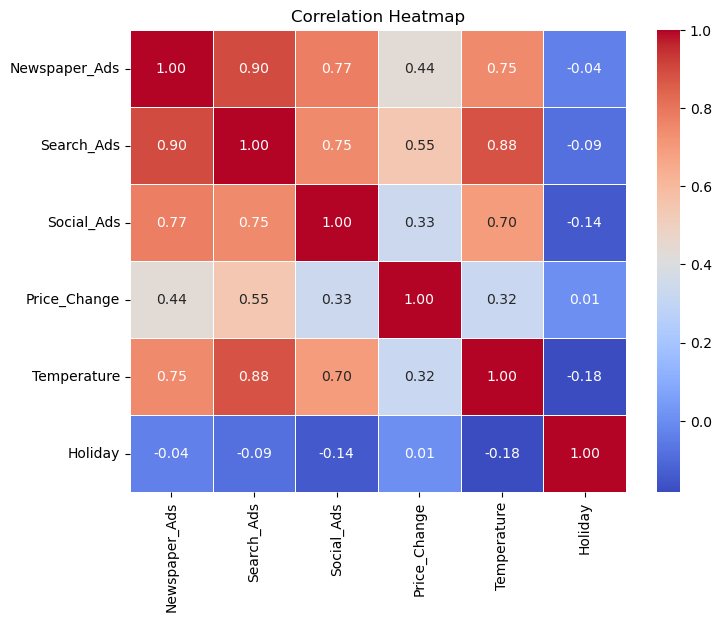

In [6]:
# Create a correlation matrix
corr = X_scaled.corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_scaled.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


f = calc_vif(X_scaled).sort_values(by = 'VIF', ascending = False)
f

,variables,VIF
1,Search_Ads,39.686533
4,Temperature,18.223327
0,Newspaper_Ads,7.215834
3,Price_Change,3.422523
2,Social_Ads,3.321323
5,Holiday,1.187002


In [8]:
X_scaled.drop(['Search_Ads'], axis = 1, inplace = True)

In [9]:
# Add a constant to the independent variables (for the intercept)
X_scaled = sm.add_constant(X_scaled)

X_scaled.head()

,const,Newspaper_Ads,Social_Ads,Price_Change,Temperature,Holiday
0,1.0,0.0,0.0,0.285714,0.156576,1.0
1,1.0,0.0,0.0,0.285714,0.104384,0.0
2,1.0,0.0,0.0,0.285714,0.131524,0.0
3,1.0,0.0,0.0,0.285714,0.000000,0.0
4,1.0,0.0,0.0,0.285714,0.054280,0.0


In [10]:
# Fit the OLS model
model = sm.OLS(y, X_scaled).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     326.3
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.03e-34
Time:                        19:48:28   Log-Likelihood:                -331.78
No. Observations:                  52   AIC:                             675.6
Df Residuals:                      46   BIC:                             687.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2565.7623     49.402     51.936

In [11]:
predicted_revenue = model.predict(X_scaled)
print("Predicted Revenue:")
predicted_revenue.head()

Predicted Revenue:


0    3444.192911
1    2565.660080
2    2603.321117
3    2420.809936
4    2496.132011
dtype: float64

In [12]:
# Get the coefficients (excluding the constant)
coefficients = model.params[1:]
print('coefficients: ', coefficients)

# Calculate the contribution of each feature
contributions = X_scaled.iloc[:, 1:].multiply(coefficients, axis=1)

# Add a column for the baseline (intercept)
contributions['Baseline'] = model.params['const']

contributions= contributions[['Baseline'	,'Price_Change','Temperature',	'Newspaper_Ads',		'Social_Ads','Holiday']]
contributions.index = range(1, len(contributions) + 1)
contributions.head()

coefficients:  Newspaper_Ads     944.353942
Social_Ads        518.436068
Price_Change     -507.333296
Temperature      1387.664381
Holiday           806.107760
dtype: float64


,Baseline,Price_Change,Temperature,Newspaper_Ads,Social_Ads,Holiday
1,2565.762306,-144.95237,217.275216,0.0,0.0,806.10776
2,2565.762306,-144.95237,144.850144,0.0,0.0,0.00000
3,2565.762306,-144.95237,182.511182,0.0,0.0,0.00000
4,2565.762306,-144.95237,0.000000,0.0,0.0,0.00000
5,2565.762306,-144.95237,75.322075,0.0,0.0,0.00000


In [13]:
result= pd.DataFrame()
result['Predicted Revenue']= predicted_revenue
result['Revenue']= y
result['Error'] = result['Predicted Revenue'] - result['Revenue']
result['Error %'] = 100*result['Error']/y
result.index = range(1, len(result) + 1)
result.head()

,Predicted Revenue,Revenue,Error,Error %
1,3444.192911,3302.99,141.202911,4.275003
2,2565.660080,2706.27,-140.609920,-5.195709
3,2603.321117,2330.41,272.911117,11.710863
4,2420.809936,2351.63,69.179936,2.941787
5,2496.132011,2398.48,97.652011,4.071412


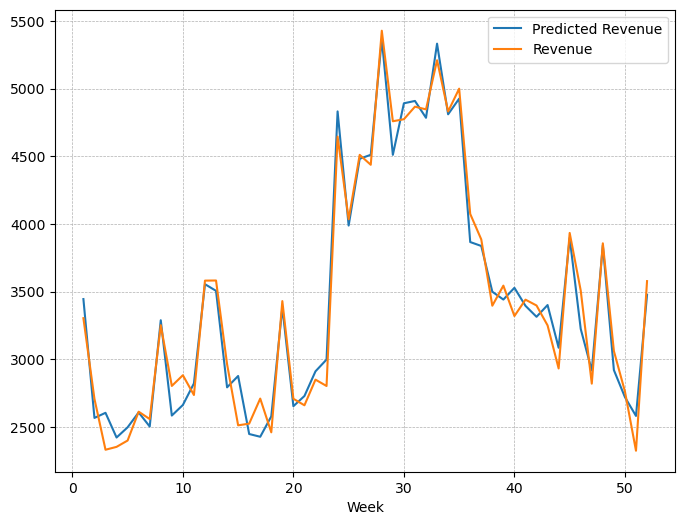

In [14]:
plt.figure(figsize = (8, 6))
plt.plot(result.index,result['Predicted Revenue'], label = 'Predicted Revenue')

plt.plot(result.index,result['Revenue'], label = 'Revenue')
plt.legend()
plt.xlabel("Week")

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

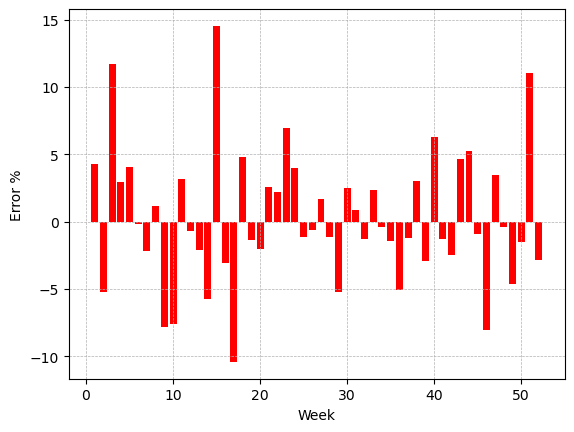

In [15]:
plt.bar(result.index,result['Error %'], color = 'r')
plt.xlabel("Week")
plt.ylabel("Error %")

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

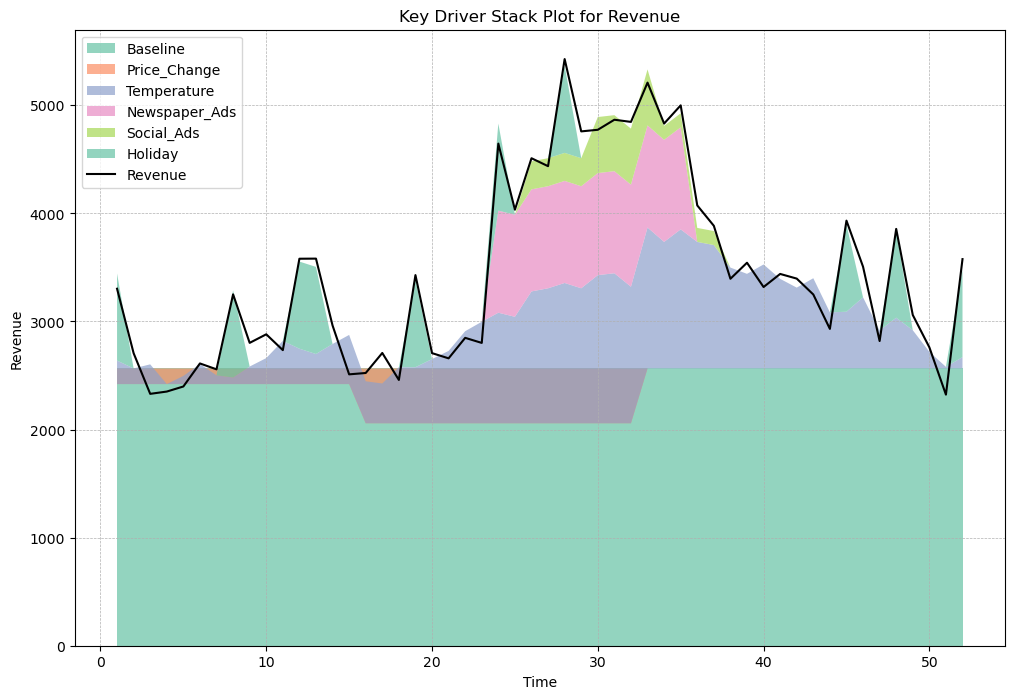

In [16]:
# Create a stack plot to show the contribution of each feature

colors = sns.color_palette("Set2", len(contributions.columns) - 1)

plt.figure(figsize=(12,8))
plt.stackplot(contributions.index, contributions.T, labels=contributions.columns, colors=colors, alpha=0.7)
plt.plot(result.index, result['Revenue'] , c = 'k' ,label = 'Revenue')
#plt.plot(Error.index, Error['Predicted Revenue'] ,c = 'b' ,label = 'Predicted Revenue')
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.title("Key Driver Stack Plot for Revenue")
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()